<center>

# `Churn Predictor - Binomial Logistic Regression`

<img src="../assets/image.png" alt="Texto alternativo" width="1300">

</center>

# `What version of scikit-learn do we have?`

In [1]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


# `Import libraries`

In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# `Load data`

In [3]:
df_data = pd.read_csv('../data/telco_data.csv')
df_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4958,2676-SSLTO,Male,0,No,No,49,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),66.15,3199.00,No
4103,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,No
4738,1338-CECEE,Male,0,Yes,Yes,41,Yes,Yes,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),68.50,2839.95,No
238,1777-JYQPJ,Male,0,No,No,2,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,24.30,38.45,No
2648,2436-QBZFP,Female,0,Yes,Yes,22,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,39.20,849.90,No


In [5]:
# to show column names, if there are null values and data type.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## `Drop customerID feature`

In [6]:
df_data.drop('customerID', axis=1, inplace=True)

In [7]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No
1,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
2,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
3,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
4,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No


# `Convert the target variable to numeric`

In [8]:
df_data['Churn'] = df_data['Churn'].map({'No': 0, 'Yes': 1})

In [9]:
df_data_processing = df_data.copy()

# `Handling categorical variables`

In [10]:
df_data_processing = pd.get_dummies(df_data_processing, dtype= int)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,18.80,18.80,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0,1,18.85,18.85,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2,0,1,18.85,18.85,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,1,18.90,18.90,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
4,0,1,19.00,19.00,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


# `Correlation analysis with respect to the target variable`

In [11]:
df_data_processing.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [12]:
correlation = df_data_processing.corr()['Churn'].sort_values(ascending=False)
correlation

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Femal

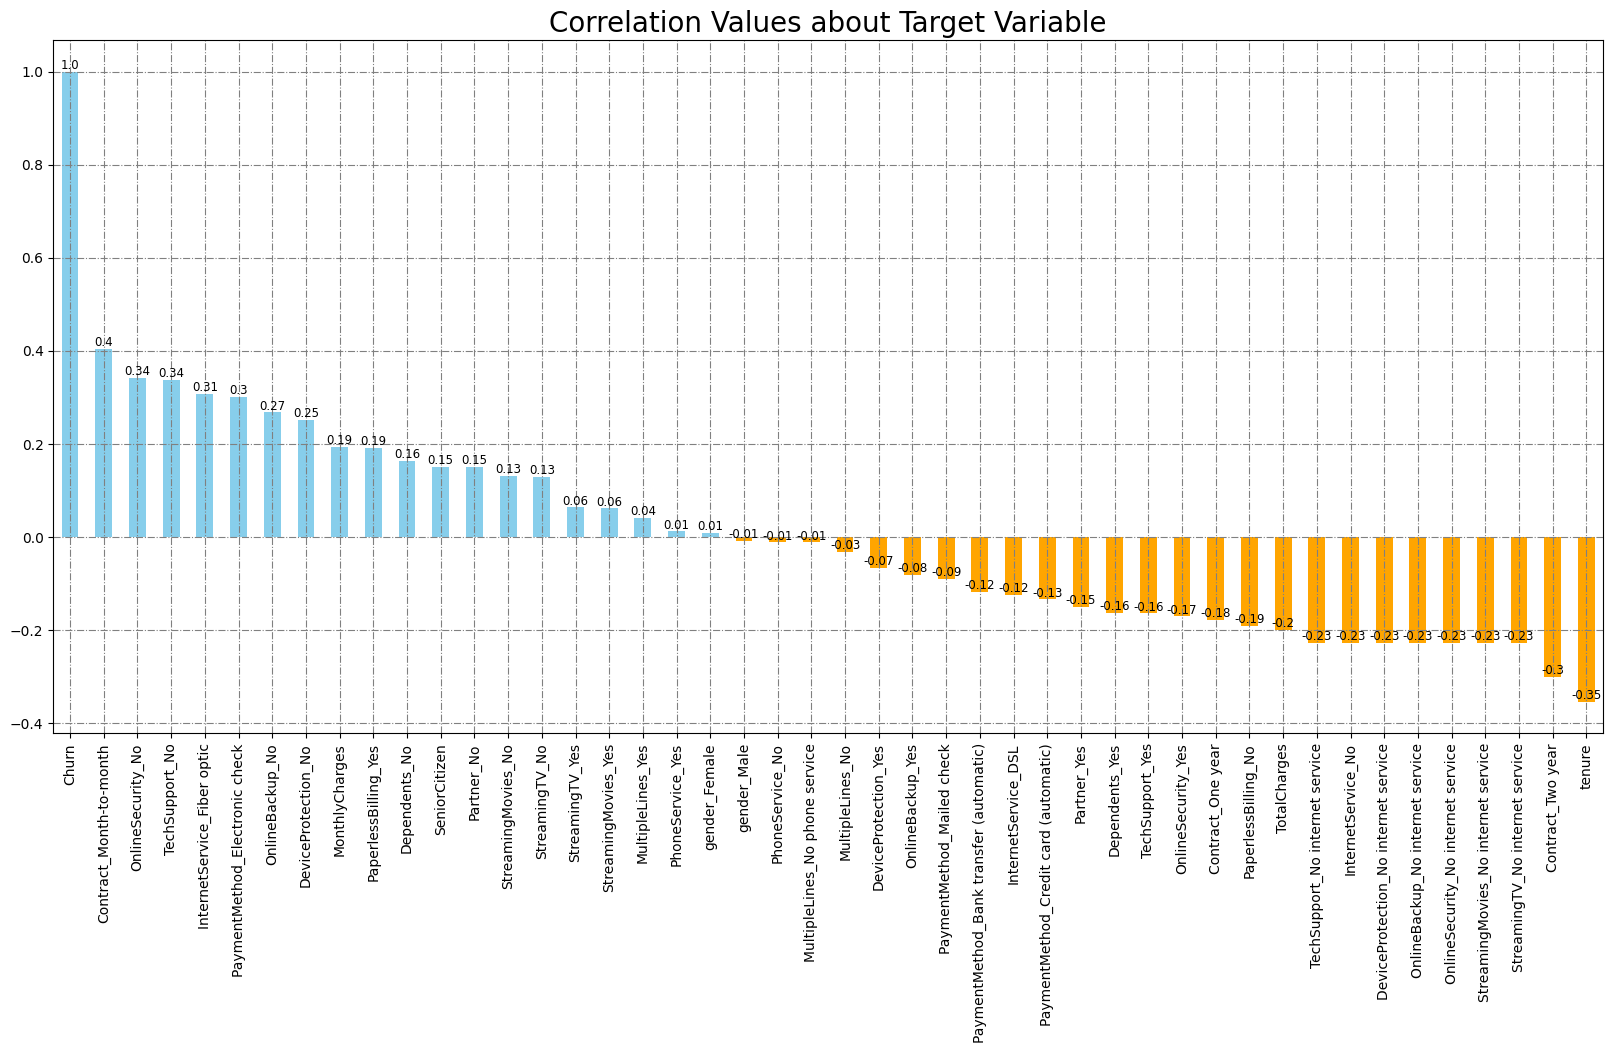

In [13]:
plt.figure(figsize=(20,9))

# to display bar plot, about correlation values
ax = (
    df_data_processing.corr()['Churn']
    .sort_values(ascending=False)
    .plot(kind='bar', color = ['orange' if x < 0 else 'skyblue' for x in correlation.values])
)

# to agregate numerical value in bars
for i, v in enumerate(correlation):
    ax.text(
        i, v,
        str(round(v, 2)),
        ha = 'center',
        va = 'bottom',
        size = 8.5
        )

plt.title("Correlation Values about Target Variable", size = 20)
ax.grid(True, axis='both', linestyle = '-.', color = 'gray')
plt.show()

# `Feature scaling`

In [14]:
# Import Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

# Convert the scaled data into a dataframe
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

# Rename columns
df_data_processing_scaled.columns = df_data_processing.columns

df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.005473,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.005970,0.000006,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.005970,0.000006,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.006468,0.000012,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.007463,0.000023,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# `EDA` 
## `Categorical features`

In [15]:
# Function to plot categorical variables
def plot_categorial(column):
    fig = plt.figure(figsize=(18,5))
    sns.countplot(data=df_data, x=column, hue='Churn')
    plt.title(f"churn VS {column}", size=18)
    plt.show()

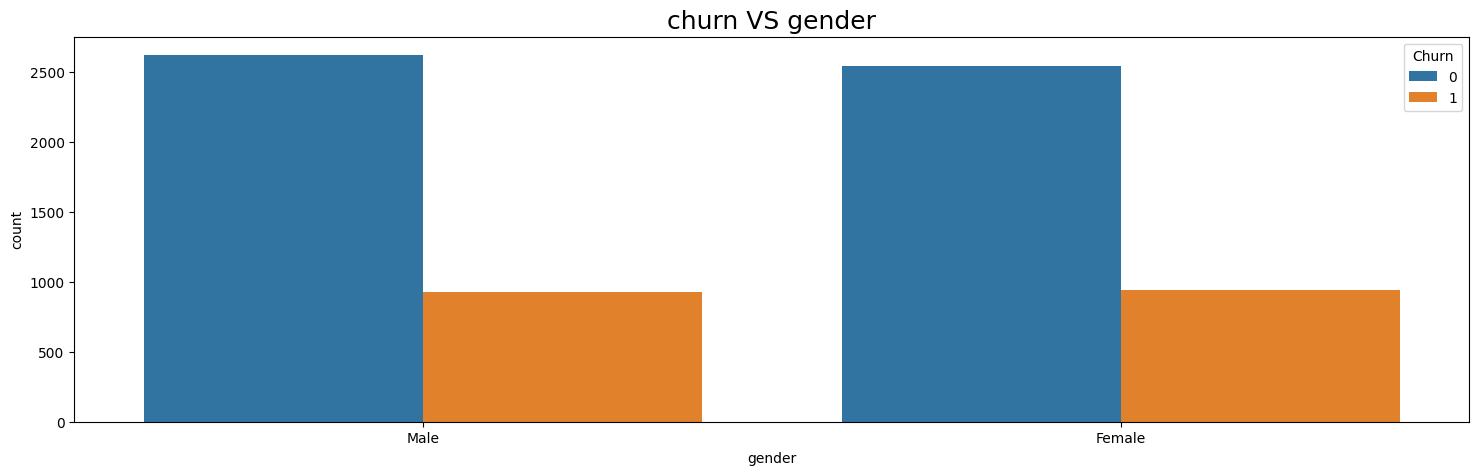

In [16]:
plot_categorial('gender')

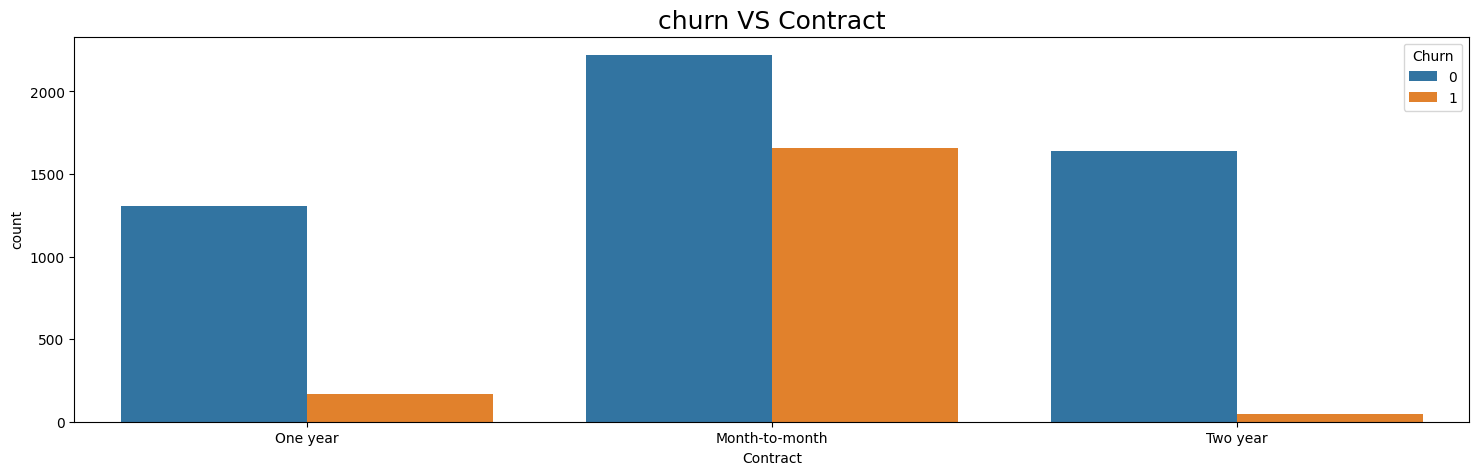

In [17]:
plot_categorial('Contract')

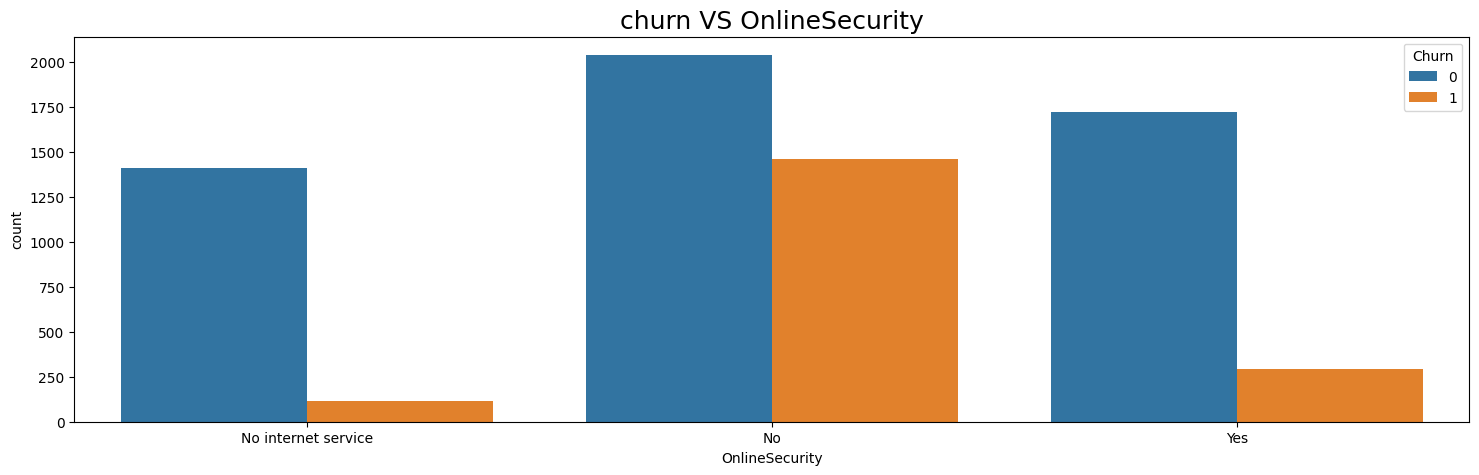

In [18]:
plot_categorial('OnlineSecurity')

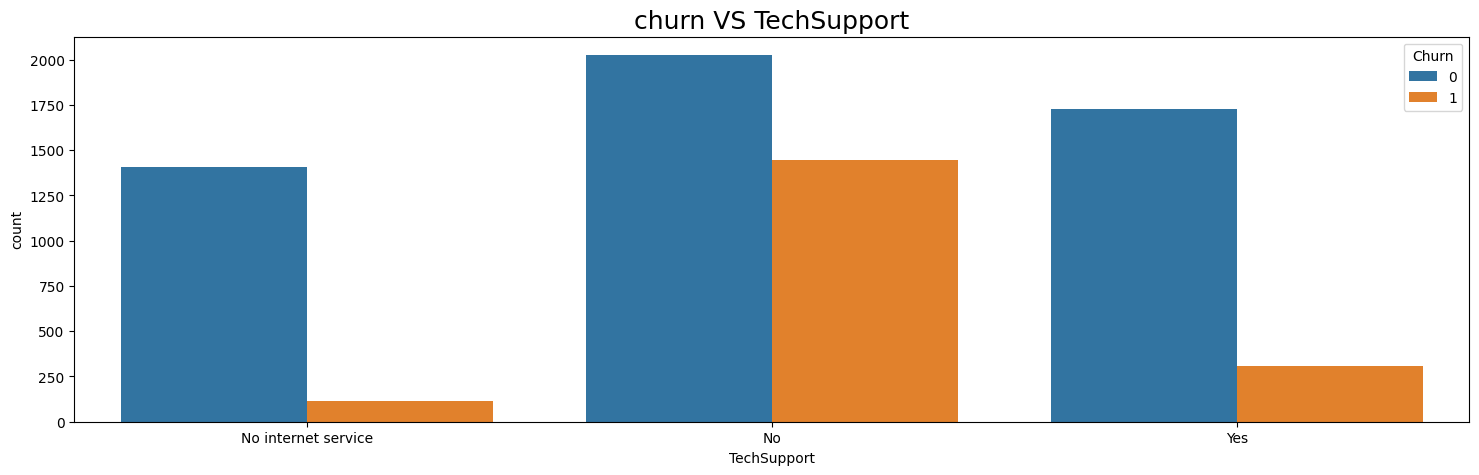

In [19]:
plot_categorial('TechSupport')

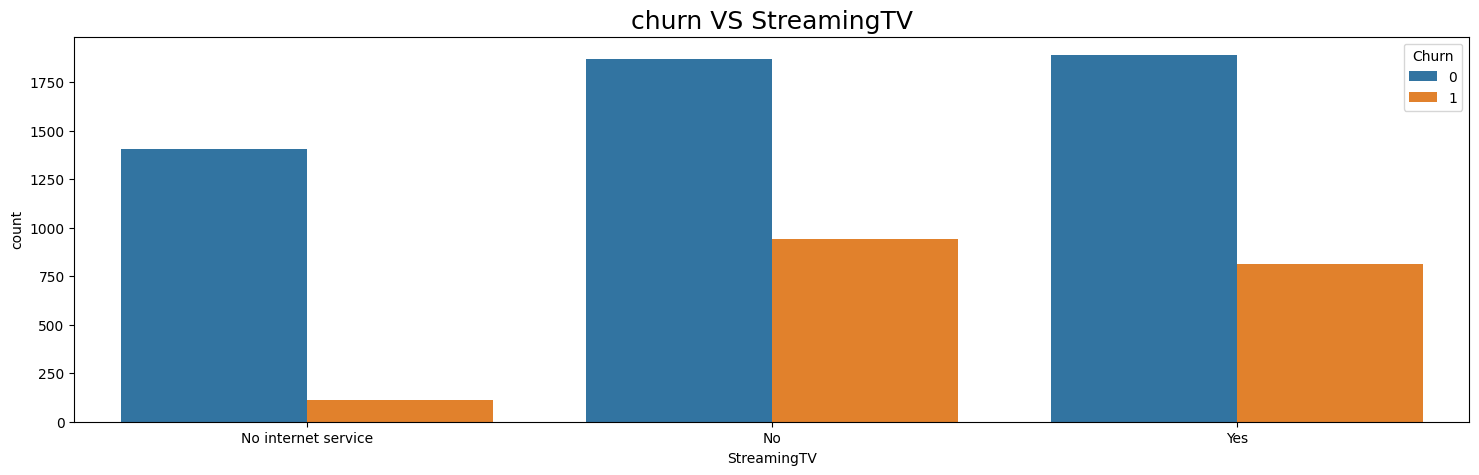

In [20]:
plot_categorial('StreamingTV')

## `Numerical features`

<Figure size 1000x1000 with 0 Axes>

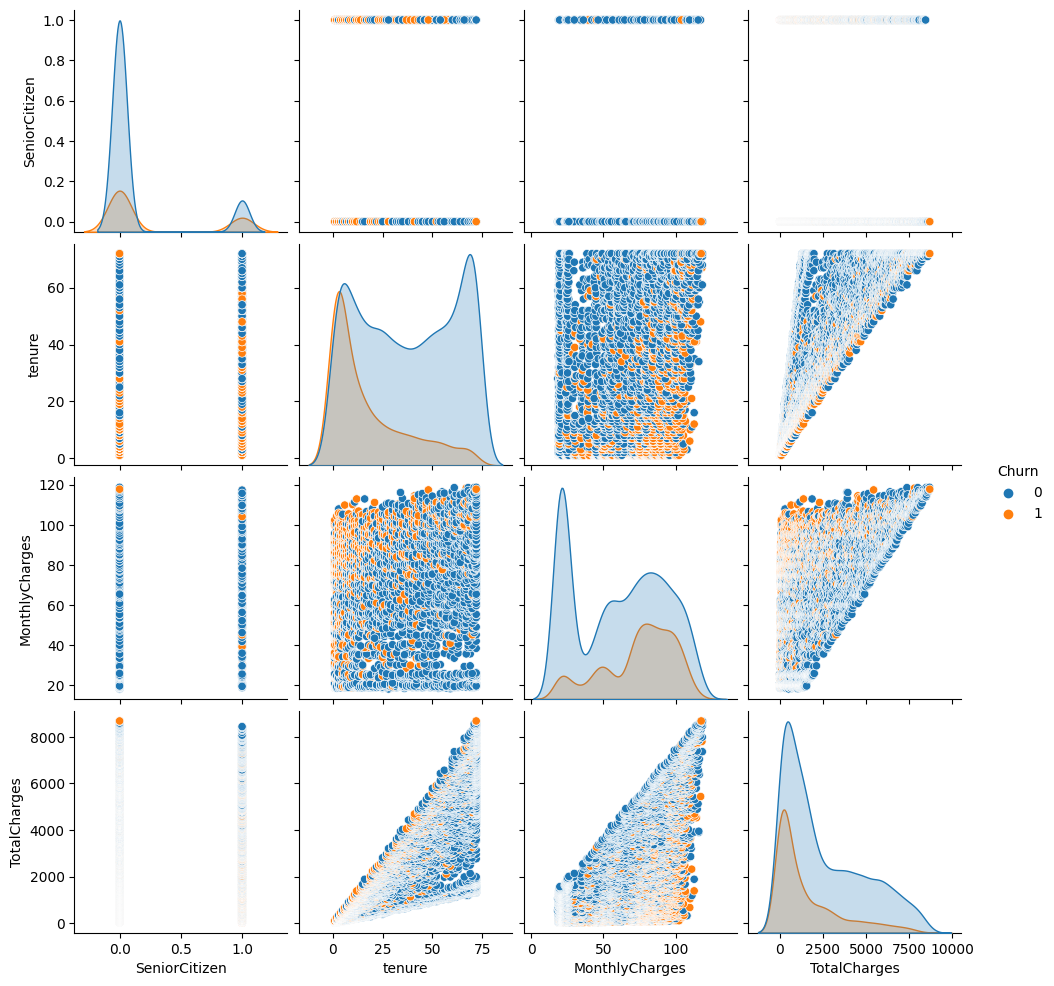

In [21]:
plt.figure(figsize=(10,10))
sns.pairplot(data = df_data, hue = 'Churn')
plt.show()

# `Train logistical model`

In [22]:
df_data_processing_scaled.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [23]:
# Here, remove columns that do not contribute to the model
X = df_data_processing_scaled.drop(['Churn', 'gender_Female', 'gender_Male', 'PhoneService_Yes', 'PhoneService_No'], axis=1)
y = df_data_processing_scaled['Churn'].values

# Splitting of training and testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Import and train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# `Metrics`

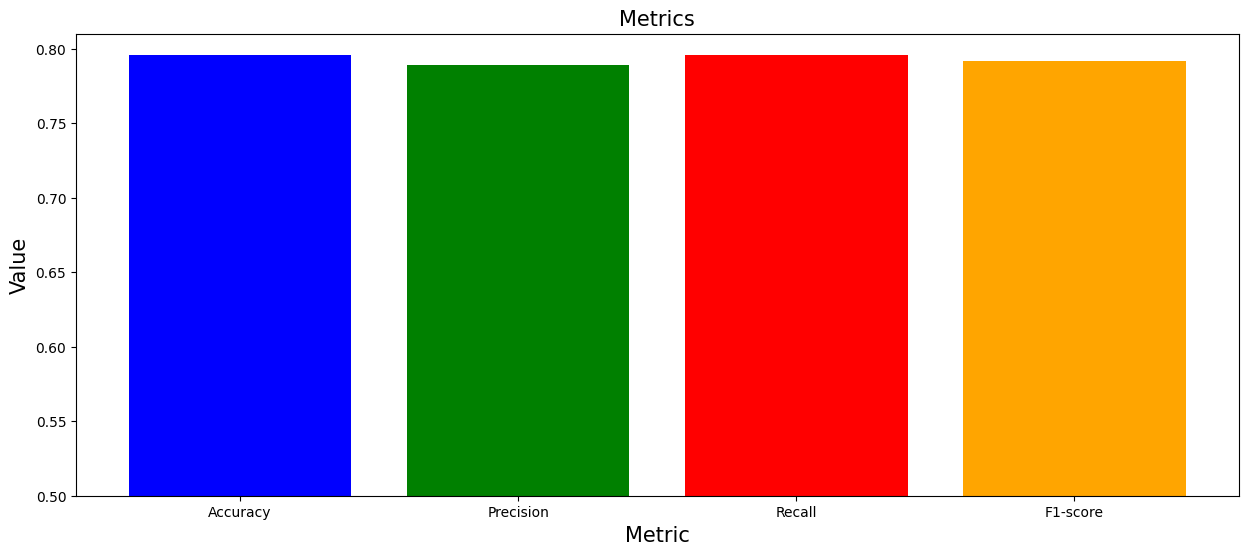

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# to do predictions
prediction_test = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, prediction_test)
precision = precision_score(y_test, prediction_test, average='weighted')
recall = recall_score(y_test, prediction_test, average='weighted')
f1 = f1_score(y_test, prediction_test, average='weighted')

# list of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Bar Plot
plt.figure(figsize=(15, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Metrics', fontsize=15)
plt.xlabel('Metric', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.ylim(0.5, 0.81)
plt.show()


# `What are the weights of each variable?`

In [29]:
model.coef_

array([[ 1.36258192e-01, -3.11605742e+00, -2.46967864e-02,
         1.23506662e+00, -1.01962925e-01, -6.26819215e-02,
         1.69620970e-03, -1.66341056e-01, -3.02409059e-01,
         2.03317958e-01, -6.55537455e-02, -4.32329983e-01,
         4.23220095e-01, -1.55534959e-01,  1.78548265e-01,
        -1.55534959e-01, -1.87658152e-01,  7.78063378e-02,
        -1.55534959e-01, -8.69162250e-02,  2.29920742e-02,
        -1.55534959e-01, -3.21019615e-02,  1.44120050e-01,
        -1.55534959e-01, -1.53229938e-01, -1.18893839e-01,
        -1.55534959e-01,  1.09783952e-01, -1.24200232e-01,
        -1.55534959e-01,  1.15090345e-01,  6.07280067e-01,
        -9.69370417e-02, -6.74987871e-01, -2.50665693e-01,
         8.60208470e-02, -8.89697074e-02, -1.86706201e-01,
         2.53705641e-01, -1.42674579e-01]])

In [25]:
weights = pd.Series(model.coef_[0], index=X.columns.values) 

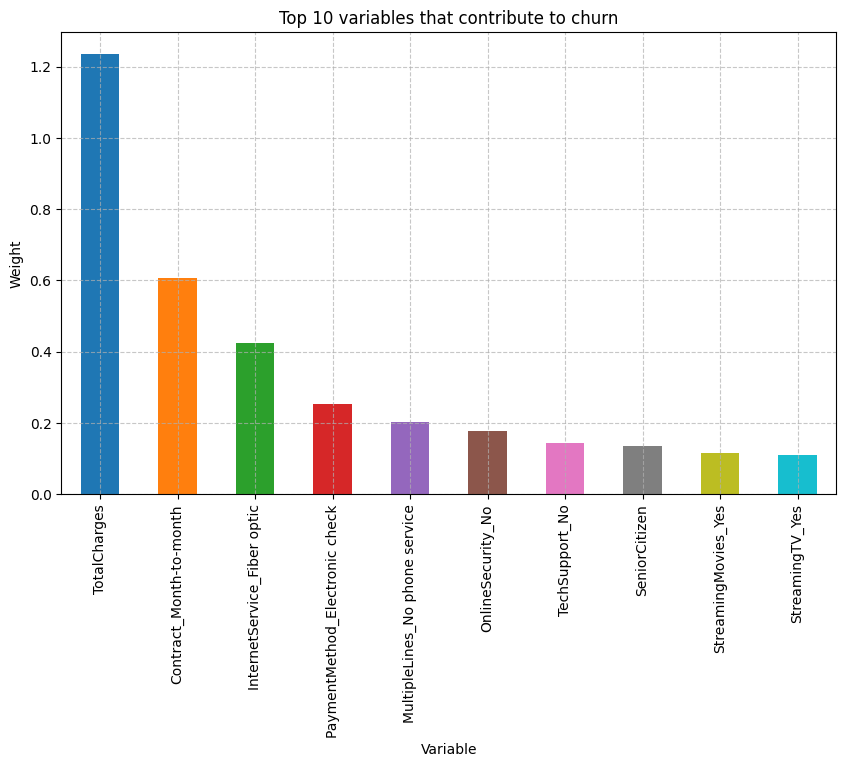

In [26]:
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors
weights_sorted = weights.sort_values(ascending=False)[:10]
weights_sorted.plot(kind='bar', color=colors)
plt.title('Top 10 variables that contribute to churn')
plt.xlabel('Variable')
plt.ylabel('Weight')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

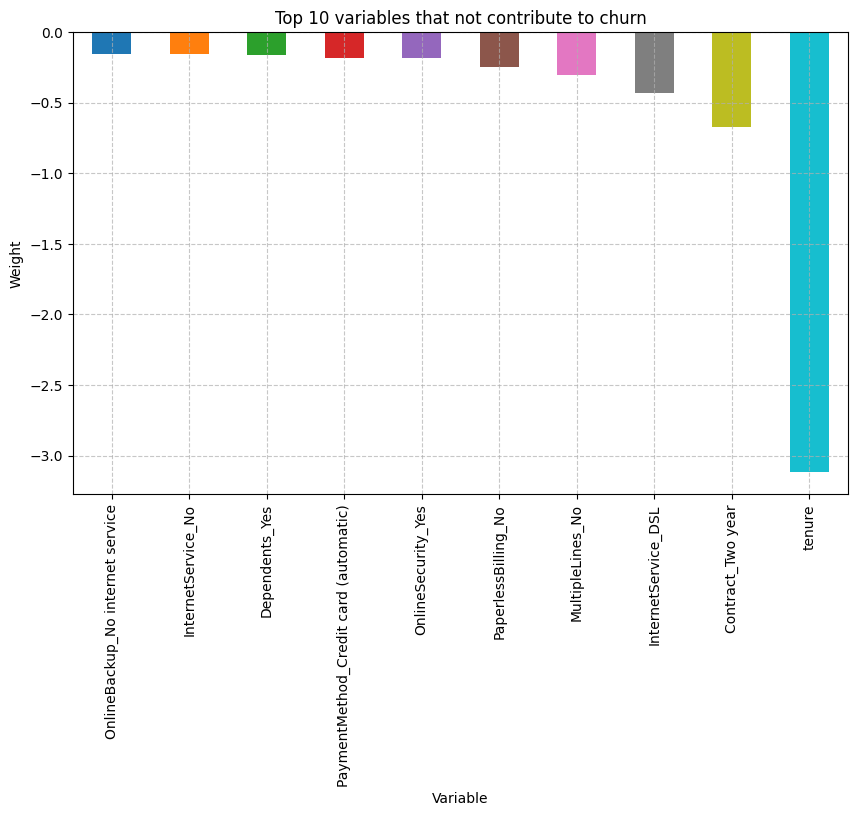

In [27]:

plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors
weights_sorted = weights.sort_values(ascending=False)[-10:]
weights_sorted.plot(kind='bar', color=colors)
plt.title('Top 10 variables that not contribute to churn')
plt.xlabel('Variable')
plt.ylabel('Weight')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# `Show Confusion Matrix`

<Figure size 1100x1100 with 0 Axes>

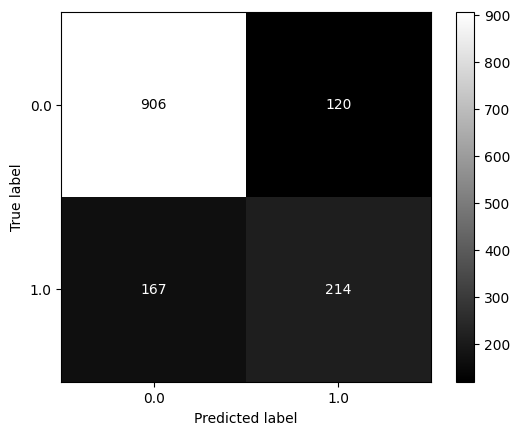

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap= 'gray')
plt.show()